<a href="https://colab.research.google.com/github/ricardooschutz/OpenData_TrabajoPractico/blob/main/OpenDataTP_WebProductScrap_RicardoSchutz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

In [18]:
url = 'https://www.roofingmegastore.co.uk/roofing-categories/pitched-roofing/roof-tiles.html'

In [19]:
#get request
response = requests.get(url)

In [20]:
#obtener estado
response.status_code

200

In [21]:
#objeto soup
soup = BeautifulSoup(response.content, 'html.parser')

 <!DOCTYPE doctype html>
<html lang="en"><head> <meta charset="utf-8"/><script type="text/javascript">(window.NREUM||(NREUM={})).init={privacy:{cookies_enabled:true},ajax:{deny_list:["bam.eu01.nr-data.net"]},distributed_tracing:{enabled:true}};(window.NREUM||(NREUM={})).loader_config={agentID:"328010286",accountID:"2609414",trustKey:"2609414",xpid:"VgAHWFJSDBADVVdXBgMEUlI=",licenseKey:"NRJS-df46f8275b6868781e2",applicationID:"316512346"};window.NREUM||(NREUM={}),__nr_require=function(t,e,n){function r(n){if(!e[n]){var o=e[n]={exports:{}};t[n][0].call(o.exports,function(e){var o=t[n][1][e];return r(o||e)},o,o.exports)}return e[n].exports}if("function"==typeof __nr_require)return __nr_require;for(var o=0;o<n.length;o++)r(n[o]);return r}({1:[function(t,e,n){function r(t){try{s.console&&console.log(t)}catch(e){}}var o,i=t("ee"),a=t(31),s={};try{o=localStorage.getItem("__nr_flags").split(","),console&&"function"==typeof console.log&&(s.console=!0,o.indexOf("dev")!==-1&&(s.dev=!0),o.indexOf(
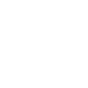
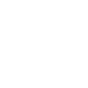
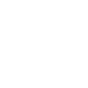
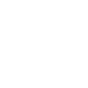
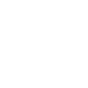
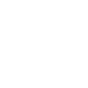
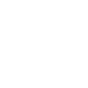
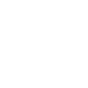
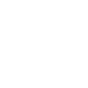
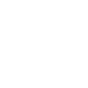
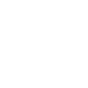
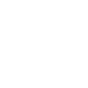
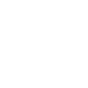
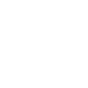
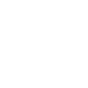
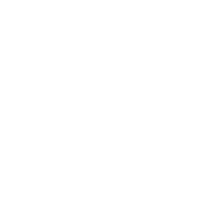
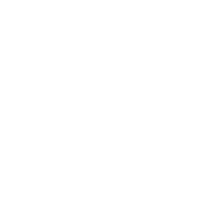
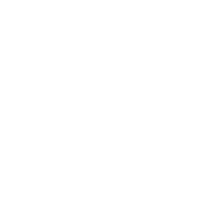
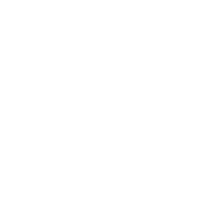
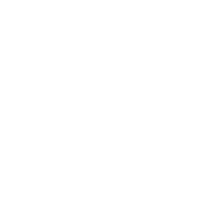
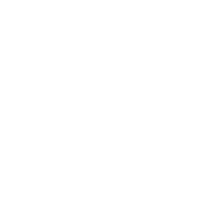
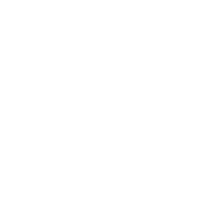
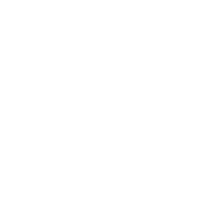
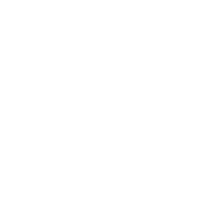
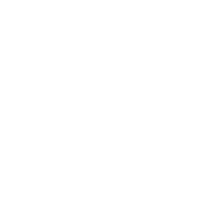
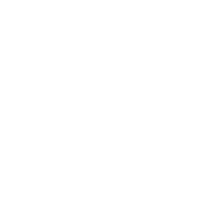
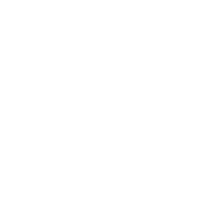
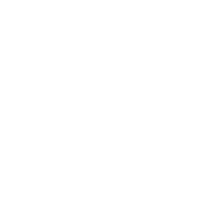
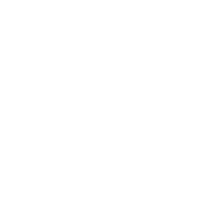
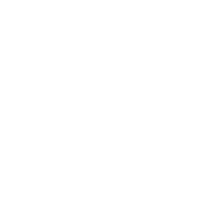
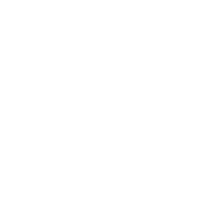
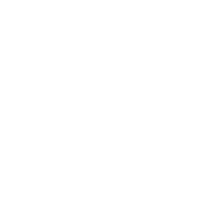
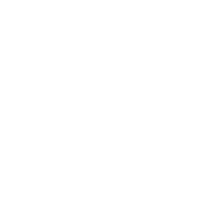
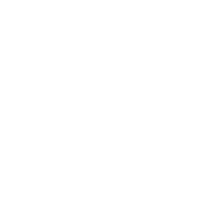
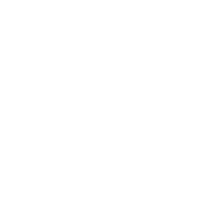
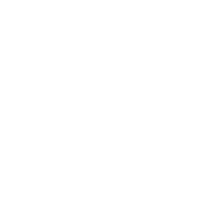
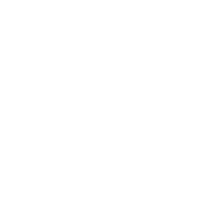
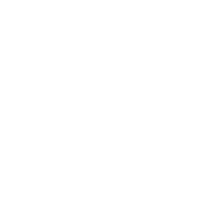
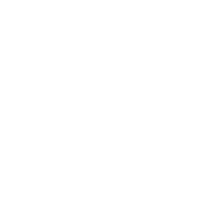
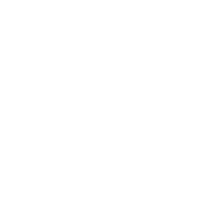
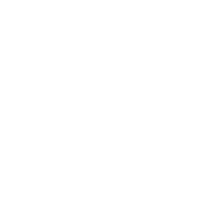
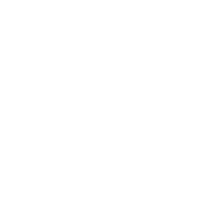
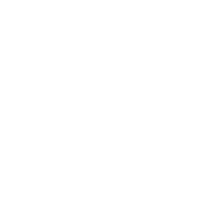
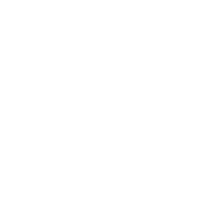
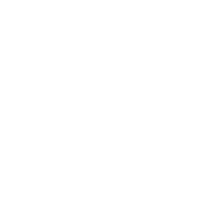
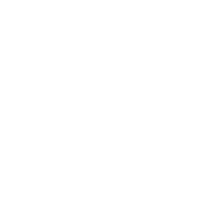
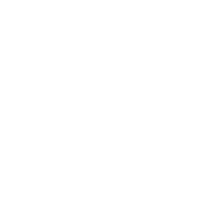
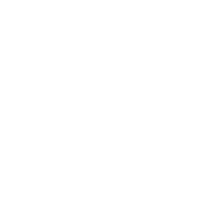
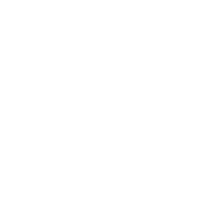
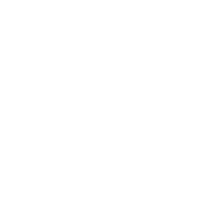
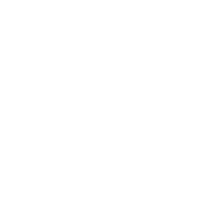
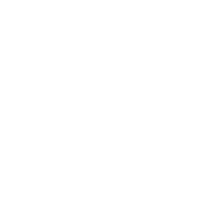
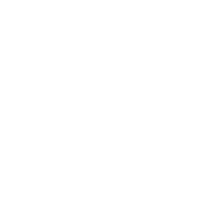
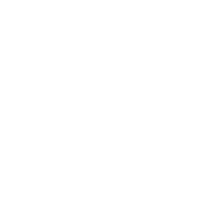
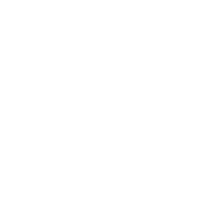
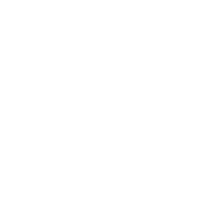
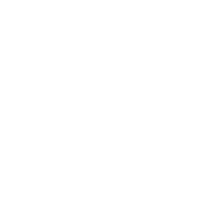
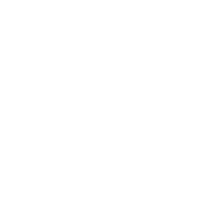
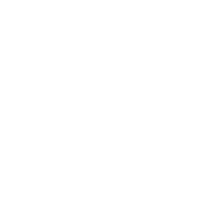
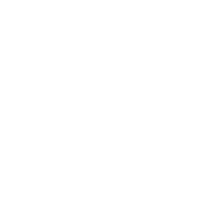
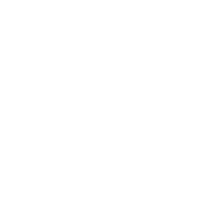
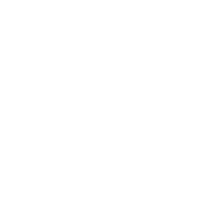
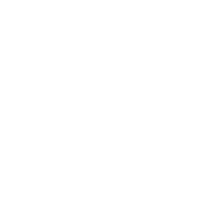

In [22]:
#llamada al contenido html
soup

In [23]:
#encontrar los resultados
results = soup.find_all('a',{'class':'product-list__link gtmTrack0020'})

In [24]:
len(results)

24

In [25]:
product_name = []
product_price = []
product_price_m2 = []
 
for i in range(1,16):
  #website
  website = 'https://www.roofingmegastore.co.uk/roofing-categories/pitched-roofing/roof-tiles.html?p=' + str(i)

  #request
  response = requests.get(url)

  #soup object
  soup = BeautifulSoup(response.content, 'html.parser')

  #results
  results = soup.find_all('a',{'class':'product-list__link gtmTrack0020'}) 

  #loop de resultados
  for result in results:

  #nombre del producto
    try:
      product_name.append(result.find('h4',{'class':'product-list__title'}).get_text())
    except:
      product_name.append('no disponible')

  #precio unitario

    try:
      product_price.append(result.find('p',{'class':'final-price__price'}).get_text())
    except:
      product_price.append('no disponible')

  #precio por m2
    try:
      product_price_m2.append(result.find('p',{'class':'m2-price__price'}).get_text())
    except:
      product_price_m2.append('no disponible')


##Crear data frame de pandas

In [26]:
product_overview = pd.DataFrame({'Nombre': product_name, 'Precio':  product_price, 'Precio por m2':  product_price_m2 })

In [27]:
#limpieza de precios
product_overview['Precio'] = product_overview['Precio'].str.replace('£', '')
product_overview['Precio por m2'] = product_overview['Precio por m2'].str.replace('£', '')

In [28]:
product_overview

,Nombre,Precio,Precio por m2
0,Redland Renown Tile - Concrete Tile - Smooth S...,2.45,23.77
1,Marley Double Roman Concrete Roof Tiles (Pack ...,63.67,no disponible
2,Redland Regent Tile - Concrete Tile - Smooth F...,2.57,24.93
3,Marley Acme Double Camber Clay Plain Tiles (Pa...,13.33,no disponible
4,Sandtoft Neo Pantile - Clay Tile - Antique Slate,3.48,no disponible
...,...,...,...
355,Britmet - Slate 2000 Plus - Lightweight Metal ...,14.37,31.18
356,Britmet - Ultratile Plus - Lightweight Metal R...,14.37,31.33
357,Britmet - Ultratile Plus - Lightweight Metal R...,14.37,31.33
358,Britmet - Villatile Plus - Lightweight Metal R...,14.57,32.78


##Guardar en un Excel

In [29]:
product_overview.to_csv('tejas_precios_inglaterra.csv')